<a href="https://colab.research.google.com/github/aashu-0/learn-pytorch/blob/main/01pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [24]:
# data creation
# creating known paramas
weight = 0.7
bias = 0.3

#create data
X= torch.arange(0,1,0.02)    #features
X = X.unsqueeze(dim=1)       #labels
y = weight*X +bias

len(X), X[:10], y[:10]

(50,
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [25]:
#train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[: train_split]
X_test, y_test = X[train_split: ], y[train_split :]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

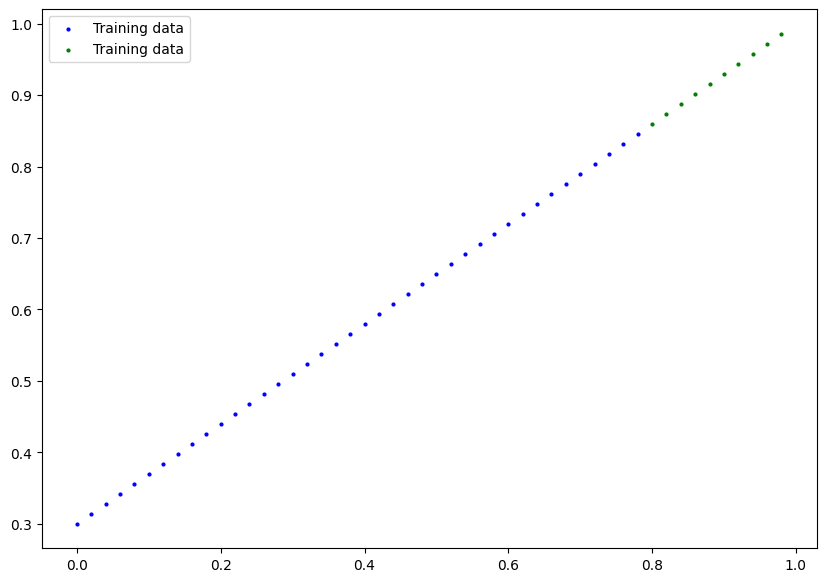

In [26]:
# visualizing the trainig and test set

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None
                     ):
  plt.figure(figsize = (10,7))

  #training data in blue
  plt.scatter(train_data, train_labels, s=4, c='b', label= 'Training data')

  # test data in green
  plt.scatter(test_data, test_labels, s=4, c='g', label= 'Training data')

  # predictions, if any in red
  if predictions is not None:
    plt.scatter(test_data, predictions, s=4, c= 'r', label = 'Prediction')

  # show thhe legend
  plt.legend()

plot_predictions()

In [27]:
# model creation
# linear regression class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                dtype =torch.float),
                                requires_grad= True)

    self.bias = nn.Parameter(torch.randn(1,
                                dtype =torch.float),
                                requires_grad= True)

    # forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:          # after -> (torch.Tensor) state the type of return variable
      return self.weights * x + self.bias


In [28]:
# checking the paramas
# set manual seed

torch.manual_seed(42)

#create an instance
model_0 = LinearRegressionModel()

# check for nn.Parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [30]:
# making prediction with this randomised model
# => will give poor predictions, but well..let's see

with torch.inference_mode():
  y_preds = model_0(X_test)

In [31]:
# check the predictions

print(f'Number of testing samples: {len(X_test)}')
print(f'Number of predictions made: {len(y_preds)}')
print(f'predicted values: {y_preds}')

Number of testing samples: 10
Number of predictions made: 10
predicted values: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


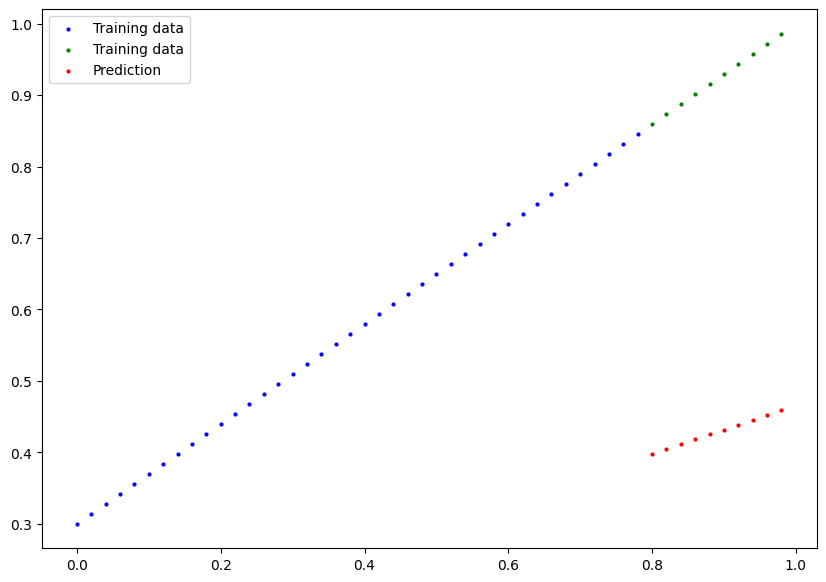

In [32]:
plot_predictions(predictions = y_preds)

In [33]:
# calculating error in predicted and actual value
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [34]:
# bad predictions, high error
# as we have taken random paramas
# it's nothing but random guessing
# now let's make our model learn

In [35]:
# ---Training the model----

# loss function: diff b/w y_preds and y_test
# optimizer: tells the model how to update its internal paramas(weight and bias)

# we wil use
# mae: mean absolute error loss function
# sgd: stochastic gradient descent optimizer


In [36]:
# create the loss function
loss_fn = nn.L1Loss()    # MAE loss is same as L1Loss

# create the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)  # lr=> learning rate



In [37]:
# training our model for 10 epochs and evaluate it every 10 epochs

torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  # >>TRAINING<<
  model_0.train()

  #forward pass
  y_pred = model_0(X_train)

  # calculating the loss
  loss = loss_fn(y_pred, y_train)

  # zero gradients
  optimizer.zero_grad()

  # loss backwards, backpropagation
  loss.backward()

  # step the optimizer
  optimizer.step()

  # >>TESTING<<

  # put model in evaluation mode
  model_0.eval()

  with torch.inference_mode():

    # forward pass
    test_pred = model_0(X_test)

    # calculate loss
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 ==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())

      print(f'Epoch: {epoch}, MAE train loss: {loss}, MAE test loss: {test_loss}')

Epoch: 0, MAE train loss: 0.31288138031959534, MAE test loss: 0.48106518387794495
Epoch: 10, MAE train loss: 0.1976713240146637, MAE test loss: 0.3463551998138428
Epoch: 20, MAE train loss: 0.08908725529909134, MAE test loss: 0.21729660034179688
Epoch: 30, MAE train loss: 0.053148526698350906, MAE test loss: 0.14464017748832703
Epoch: 40, MAE train loss: 0.04543796554207802, MAE test loss: 0.11360953003168106
Epoch: 50, MAE train loss: 0.04167863354086876, MAE test loss: 0.09919948130846024
Epoch: 60, MAE train loss: 0.03818932920694351, MAE test loss: 0.08886633068323135
Epoch: 70, MAE train loss: 0.03476089984178543, MAE test loss: 0.0805937647819519
Epoch: 80, MAE train loss: 0.03132382780313492, MAE test loss: 0.07232122868299484
Epoch: 90, MAE train loss: 0.02788739837706089, MAE test loss: 0.06473556160926819


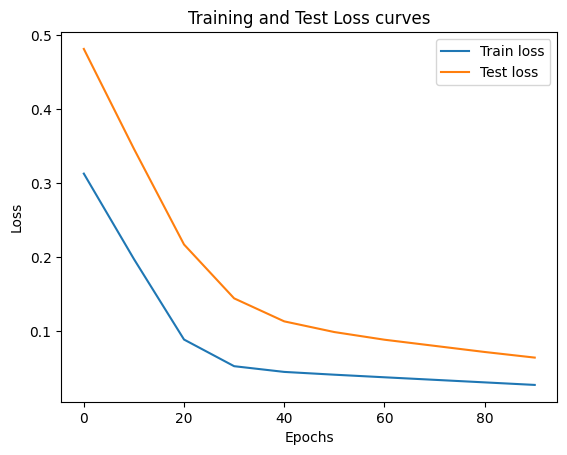

In [38]:
# plotting the loss curves

plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and Test Loss curves")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [39]:
# we can see the loss is going down
# why?? all thanks to loss function and optimizer

# finding our model's learned parameters

print(f'The model learned parameters: \n{model_0.state_dict()}')
print(f'\nThe Original parameters: {weight}, {bias}')

The model learned parameters: 
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

The Original parameters: 0.7, 0.3


In [40]:
# let's try increasing the number of epochs and see the loss curves and paramas

# torch.manual_seed(42)

# epochs = 200

# train_loss_values = []
# test_loss_values = []
# epoch_count = []

# for epoch in range(epochs):

#   # >>TRAINING<<
#   model_0.train()

#   #forward pass
#   y_pred = model_0(X_train)

#   # calculating the loss
#   loss = loss_fn(y_pred, y_train)

#   # zero gradients
#   optimizer.zero_grad()

#   # loss backwards, backpropagation
#   loss.backward()

#   # step the optimizer
#   optimizer.step()

#   # >>TESTING<<

#   # put model in evaluation mode
#   model_0.eval()

#   with torch.inference_mode():

#     # forward pass
#     test_pred = model_0(X_test)

#     # calculate loss
#     test_loss = loss_fn(test_pred, y_test.type(torch.float))

#     if epoch % 10 ==0:
#       epoch_count.append(epoch)
#       train_loss_values.append(loss.detach().numpy())
#       test_loss_values.append(test_loss.detach().numpy())

#       print(f'Epoch: {epoch}, MAE train loss: {loss}, MAE test loss: {test_loss}')


In [41]:
# plotting the loss curves

# plt.plot(epoch_count, train_loss_values, label = "Train loss")
# plt.plot(epoch_count, test_loss_values, label = "Test loss")
# plt.title("Training and Test Loss curves")
# plt.ylabel('Loss')
# plt.xlabel('Epochs')
# plt.legend()

In [42]:
# # finding our model's learned parameters

# print(f'The model learned parameters: \n{model_0.state_dict()}')
# print(f'\nThe Original parameters: {weight}, {bias}')

In [43]:
# >>>INFERENCE>>>
# making predictions with a trained Pytorch model

# set model in evaluation mode => it turns off some layers like dropout layers for faster computation
model_0.eval()

# setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

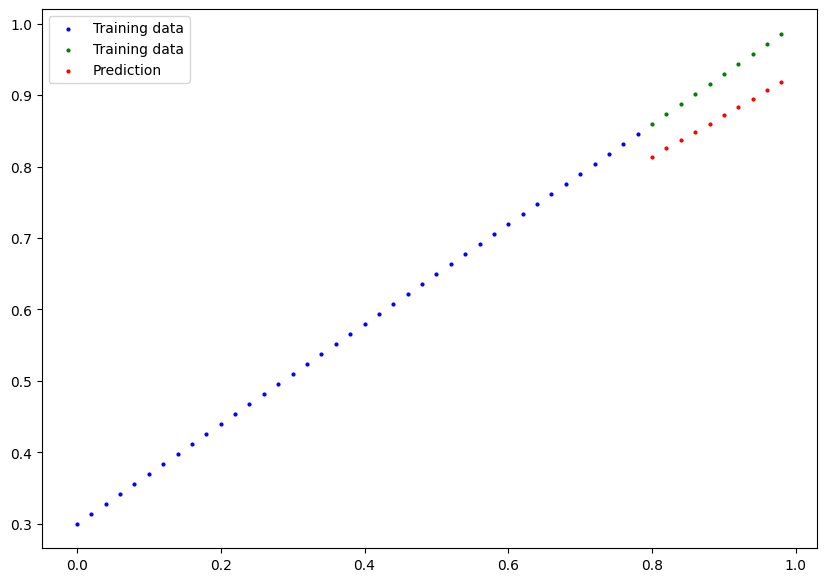

In [44]:
# plotting predictions on graph
plot_predictions(predictions= y_preds)

In [49]:
# >>>MODEL SAVING AND RELOADING>>>
# referred pytorch docs

# recommended way of saving a pytorch's model is by saving the model's state_dict()

from pathlib import Path

# create "models" directory
model_path = Path("models")
model_path.mkdir(parents = True, exist_ok = True)

# create a model save path
model_name = '01_pytorch_model_0.pth'
model_save_path = model_path/model_name

# save the model state_dict
print(f'Saving model to: {model_save_path}')

torch.save(obj=model_0.state_dict(), f =model_save_path)

Saving model to: models/01_pytorch_model_0.pth


In [50]:
# checking the saved file path
!ls -l models/01_pytorch_model_0.pth

-rw-r--r-- 1 root root 1562 Oct 17 14:40 models/01_pytorch_model_0.pth


In [51]:
# loading a saved pytorch's model's state_dict() to a new instance of our model
# before the LinearRegressionModel() instance was model_0

# instantiate a new instance of our model

loaded_model_0 = LinearRegressionModel()

# load the state_dict of our saved model(i.e model_0)
# this will update the new instance(i.e loaded_model_0) with the trained weights

loaded_model_0.load_state_dict(torch.load(f = model_save_path))

<ipython-input-51-94bee50e71d7>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f = model_save_path))


<All keys matched successfully>

In [52]:
# making predictions using loaded_model_0

# put into eval mode
loaded_model_0.eval()

# use the inference mode context manager to make predictions
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [53]:
# comparing previous preds with loaded model preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
# yay!!! --- :)